In [94]:
"""
Lab 4  |  CS‑445  |  Ali Nizar
Purpose: visualize 2020 US county‑subdivision data
"""

import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path

plt.rcParams["figure.dpi"] = 140         # crisp PNGs

ZIP_PATH = Path(r"C:\Users\Ali\CS445\Lab4_Ali\data\cb_2020_us_cousub_500k.zip")
IMG_DIR  = Path("images"); IMG_DIR.mkdir(exist_ok=True)


In [43]:
shp = f"zip://{ZIP_PATH}!cb_2020_us_cousub_500k.shp"
gdf = gpd.read_file(shp)

# keep contiguous 48
gdf = gdf[~gdf["STUSPS"].isin(["AK", "HI", "PR"])]
gdf = gdf[gdf["ALAND"] > 1e8]            # drop tiny slivers

# derive land area in square miles (easier to read)
gdf["ALAND_SQMILE"] = gdf["ALAND"] / 2.59e6
VALUE_COL = "ALAND_SQMILE"


In [45]:
state_borders = gdf.dissolve(by="STUSPS").boundary


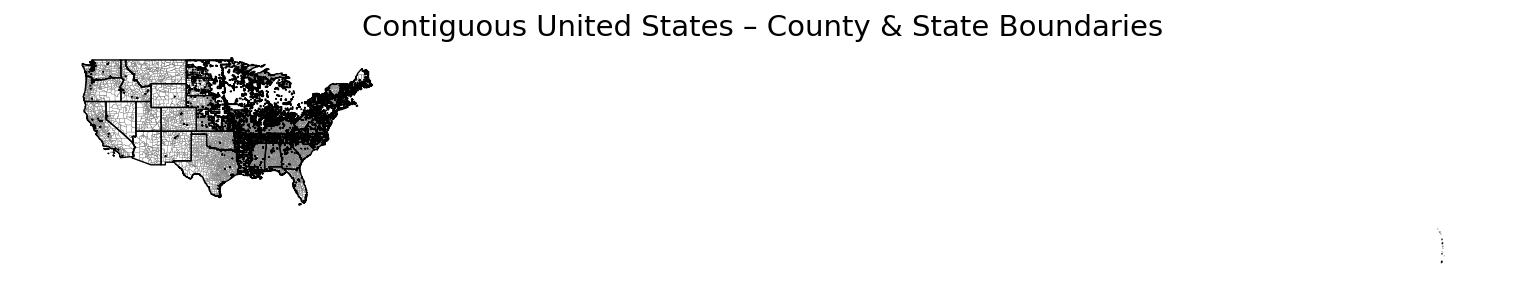

In [61]:
fig, ax = plt.subplots(figsize=(11, 7))
gdf.boundary.plot(ax=ax, linewidth=0.15, color="gray")   # county lines
state_borders.plot(ax=ax, linewidth=0.7, color="black")  # state lines
ax.set_title("Contiguous United States – County & State Boundaries", fontsize=15)
ax.set_axis_off()
plt.tight_layout()
plt.savefig(IMG_DIR / "AliNizar_BaseMap.png", bbox_inches="tight")
plt.show()


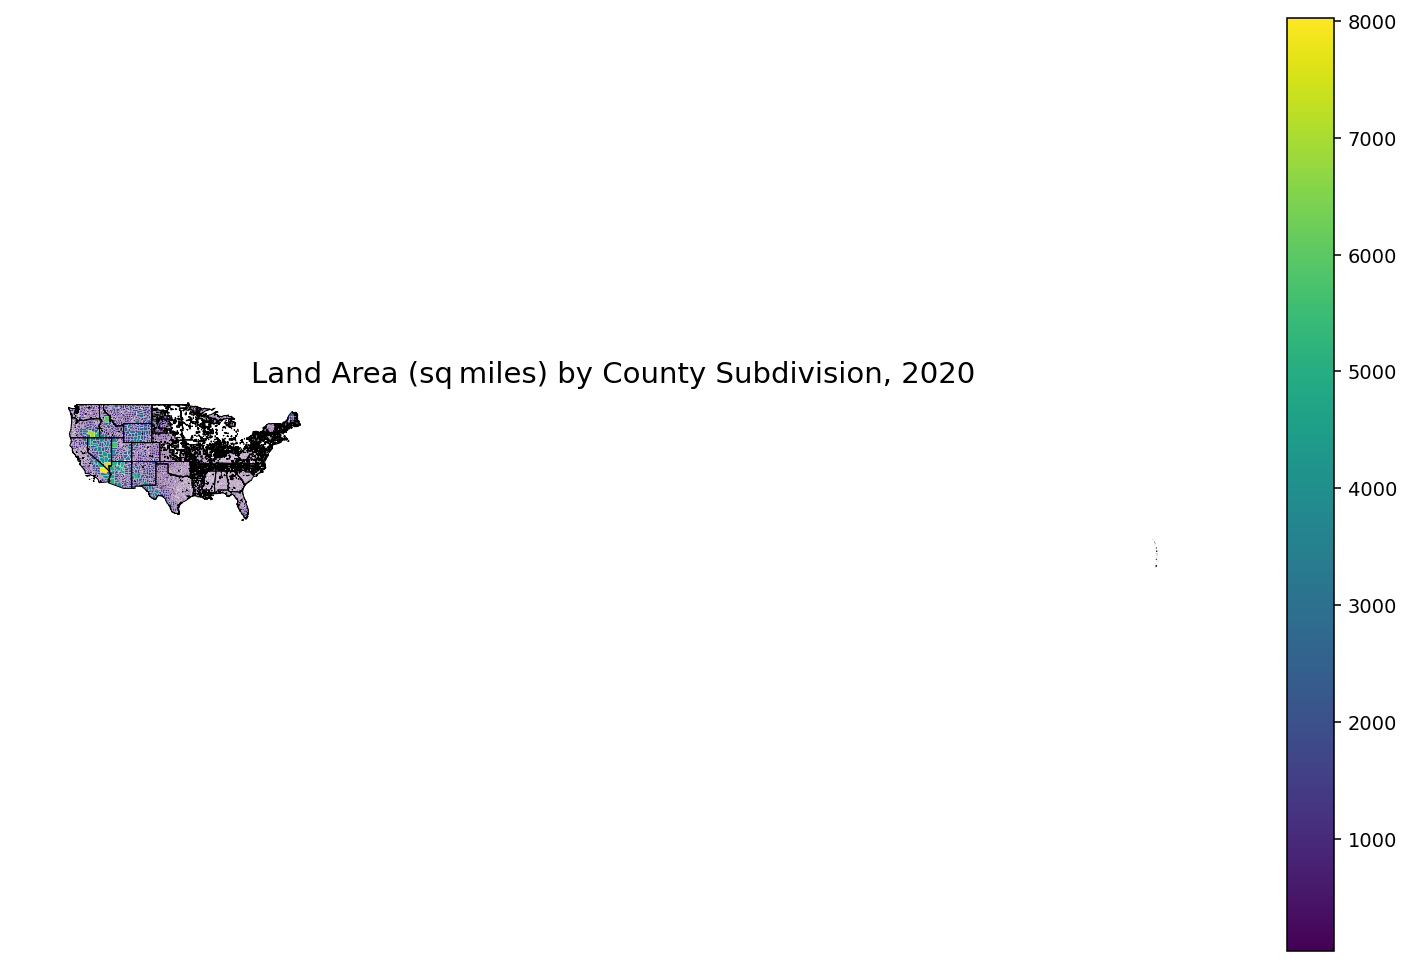

In [62]:
fig, ax = plt.subplots(figsize=(11, 7))
gdf.plot(column=VALUE_COL, cmap="viridis",
         linewidth=0.1, edgecolor="white", legend=True, ax=ax)
state_borders.plot(ax=ax, linewidth=0.5, color="black")
ax.set_title("Land Area (sq miles) by County Subdivision, 2020", fontsize=15)
ax.set_axis_off()
plt.tight_layout()
plt.savefig(IMG_DIR / "AliNizar_LandArea_Map.png", bbox_inches="tight")
plt.show()


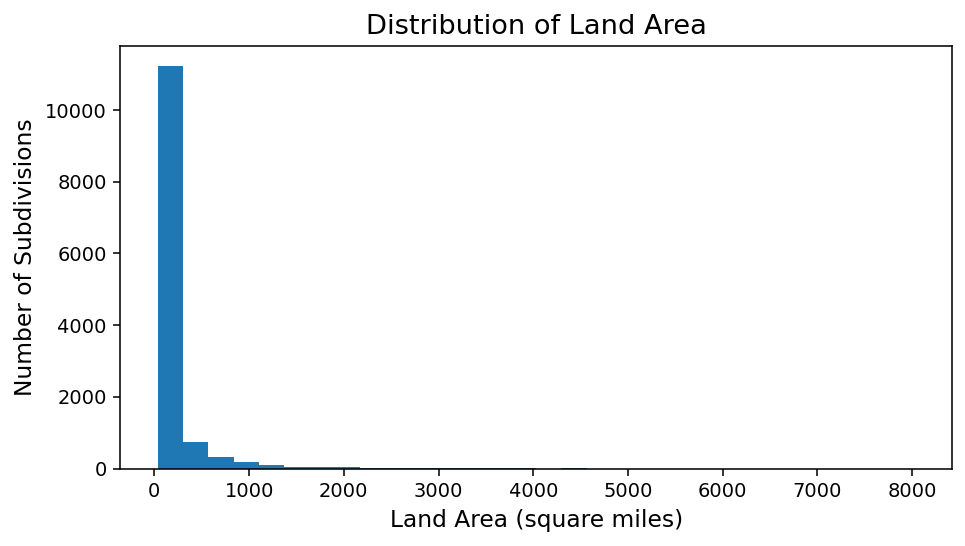

In [64]:
gdf[VALUE_COL].plot(kind="hist", bins=30, figsize=(7,4))
plt.xlabel("Land Area (square miles)", fontsize=12)
plt.ylabel("Number of Subdivisions", fontsize=12)
plt.title("Distribution of Land Area", fontsize=14)
plt.tight_layout()
plt.savefig(IMG_DIR / "AliNizar_LandArea_Histogram.png", bbox_inches="tight")
plt.show()


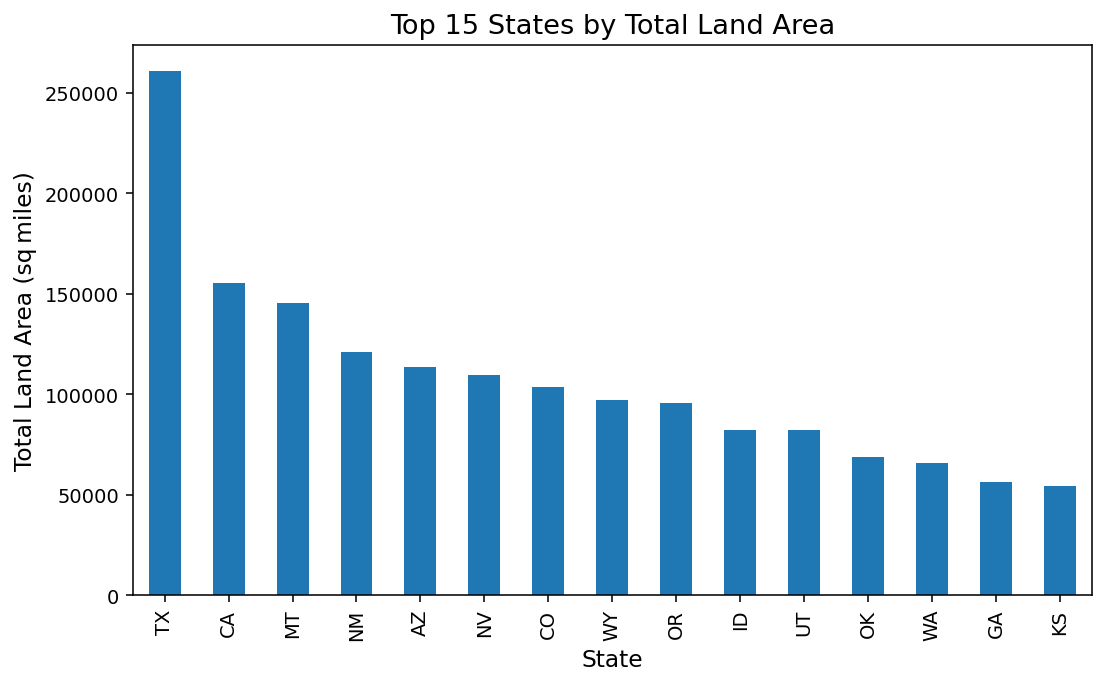

In [65]:
state_tot = gdf.groupby("STUSPS")[VALUE_COL].sum().sort_values(ascending=False).head(15)
state_tot.plot(kind="bar", figsize=(8,5))
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Land Area (sq miles)", fontsize=12)
plt.title("Top 15 States by Total Land Area", fontsize=14)
plt.tight_layout()
plt.savefig(IMG_DIR / "AliNizar_TopStates_Bar.png", bbox_inches="tight")
plt.show()


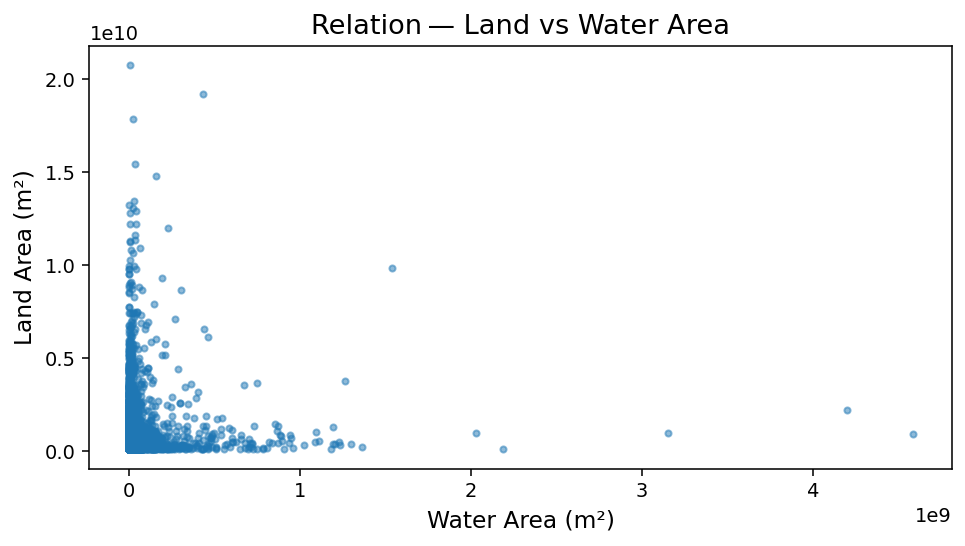

In [67]:
gdf.plot.scatter(x="AWATER", y="ALAND",
                 alpha=0.5, s=10, figsize=(7,4))
plt.xlabel("Water Area (m²)", fontsize=12)
plt.ylabel("Land Area (m²)", fontsize=12)
plt.title("Relation — Land vs Water Area", fontsize=14)
plt.tight_layout()
plt.savefig(IMG_DIR / "AliNizar_Land_vs_Water_Scatter.png", bbox_inches="tight")
plt.show()


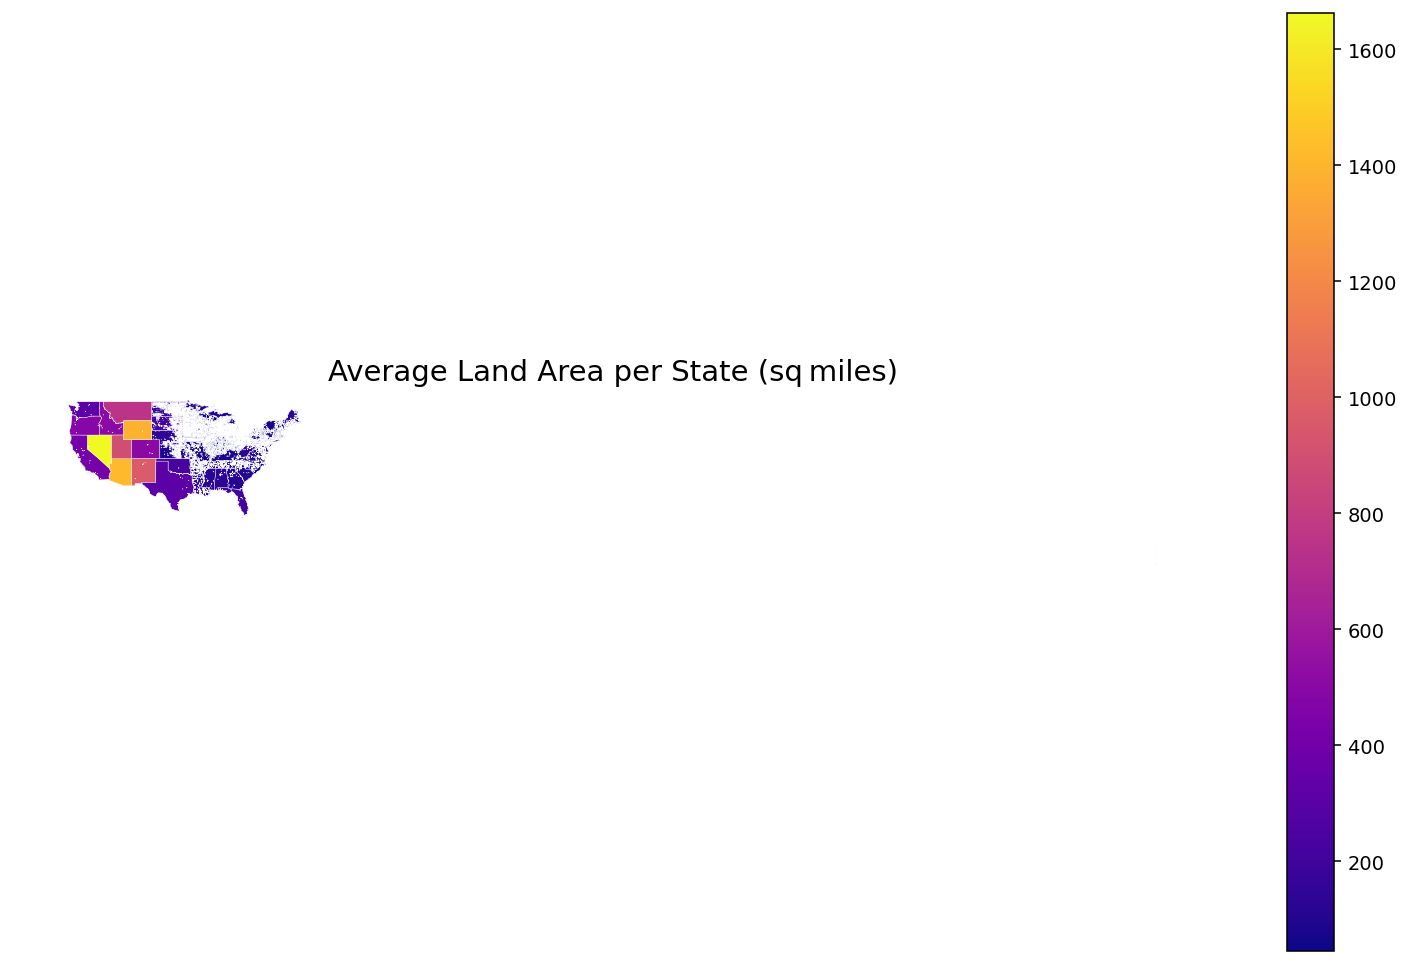

In [59]:
state_avg = gdf.groupby("STUSPS")[VALUE_COL].mean().reset_index(name="avg_land")
state_geo = gdf.dissolve(by="STUSPS").reset_index().merge(state_avg, on="STUSPS")

fig, ax = plt.subplots(figsize=(11,7))
state_geo.plot(column="avg_land", cmap="plasma",
               linewidth=0.2, edgecolor="white", legend=True, ax=ax)
ax.set_axis_off()
ax.set_title("Average Land Area per State (sq miles)", fontsize=15)
plt.tight_layout()
plt.savefig(IMG_DIR / "AliNizar_StateAverage_Map.png", bbox_inches="tight")
plt.show()


In [71]:
print("All graphs saved in", IMG_DIR.resolve())


All graphs saved in C:\Users\Ali\CS445\Lab4_Ali\images
